In [5]:
from google.colab import files
uploaded = files.upload()


Saving emissions data.csv.zip to emissions data.csv (1).zip


In [6]:
import zipfile
import pandas as pd

# Step 1: Unzip the file
with zipfile.ZipFile("emissions data.csv.zip", "r") as zip_ref:
    zip_ref.extractall()  # Extracts in current folder

# Step 2: Load the CSV
df = pd.read_csv("emissions data.csv")  # Use exact name inside ZIP
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'emissions data.csv'

In [7]:
import zipfile

with zipfile.ZipFile("emissions data.csv.zip", "r") as zip_ref:
    zip_ref.printdir()


File Name                                             Modified             Size
co2_emission.csv                               2020-09-14 09:59:26       584073


In [8]:
import zipfile
import pandas as pd

# Step 1: Unzip the file
with zipfile.ZipFile("emissions data.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# Step 2: Load the actual CSV file
df = pd.read_csv("co2_emission.csv")
df.head()


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [9]:
# Keep only relevant columns
df = df[['Entity', 'Year', 'Annual CO₂ emissions (tonnes )']]

# Filter data for a single country — e.g., Afghanistan
country_data = df[df['Entity'] == 'Afghanistan'].dropna()

# Rename the emission column for easier access
country_data.rename(columns={'Annual CO₂ emissions (tonnes )': 'Emissions'}, inplace=True)

country_data.head()


,Entity,Year,Emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Drop 'Entity' and define features/target
X = country_data[['Year']]
y = country_data['Emissions']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model and train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error: 1340967.07
R² Score: -1.4855


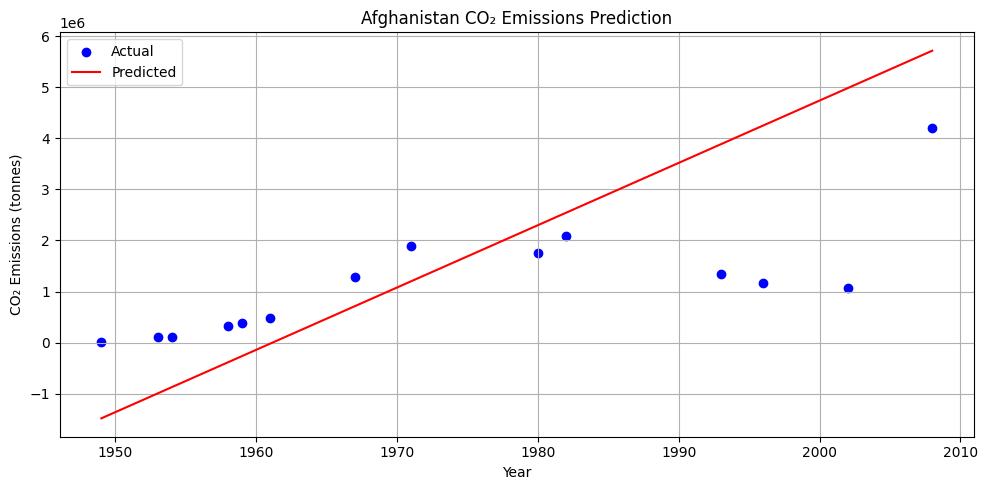

In [11]:
# Sort for cleaner plotting
sorted_indices = X_test['Year'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.title("Afghanistan CO₂ Emissions Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
